In [74]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
from sklearn.model_selection import GridSearchCV

In [75]:
# --> Cancer Classification
# https://www.kaggle.com/code/shubhankartiwari/cancer-classification

datas = pd.read_csv("dataset_prn/data.csv")

In [76]:
datas.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [77]:
datas.shape

(569, 33)

In [78]:
datas.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32'],
      dtype='object')

In [79]:
datas.diagnosis.value_counts()

,count
diagnosis,
B,357
M,212


In [80]:
datas.isnull().sum()

,0
id,0
diagnosis,0
radius_mean,0
texture_mean,0
perimeter_mean,0
area_mean,0
smoothness_mean,0
compactness_mean,0
concavity_mean,0
concave points_mean,0


In [81]:
datas.drop(['Unnamed: 32','id'],axis=1,inplace=True)

In [82]:
datas[datas.isnull().any(axis=1)]

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst


In [83]:
datas.isnull().any(axis=1)

,0
0,False
1,False
2,False
3,False
4,False
...,...
564,False
565,False
566,False
567,False


In [84]:
datas.describe()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [85]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
datas['diagnosis'] = encoder.fit_transform(datas['diagnosis'])

corr=datas.corr()
corr.shape

(31, 31)

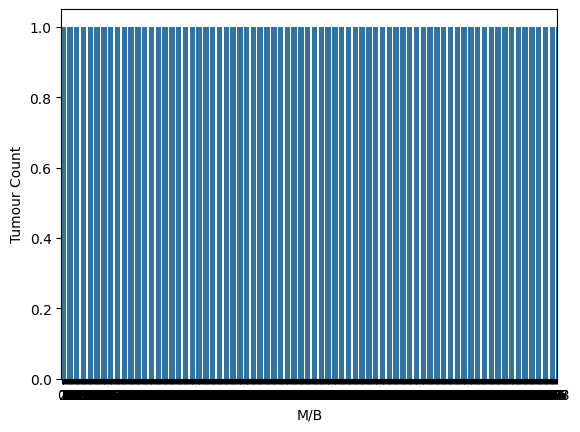

In [86]:
sns.countplot(datas['diagnosis'])
plt.xlabel('M/B')
plt.ylabel('Tumour Count')
plt.show()

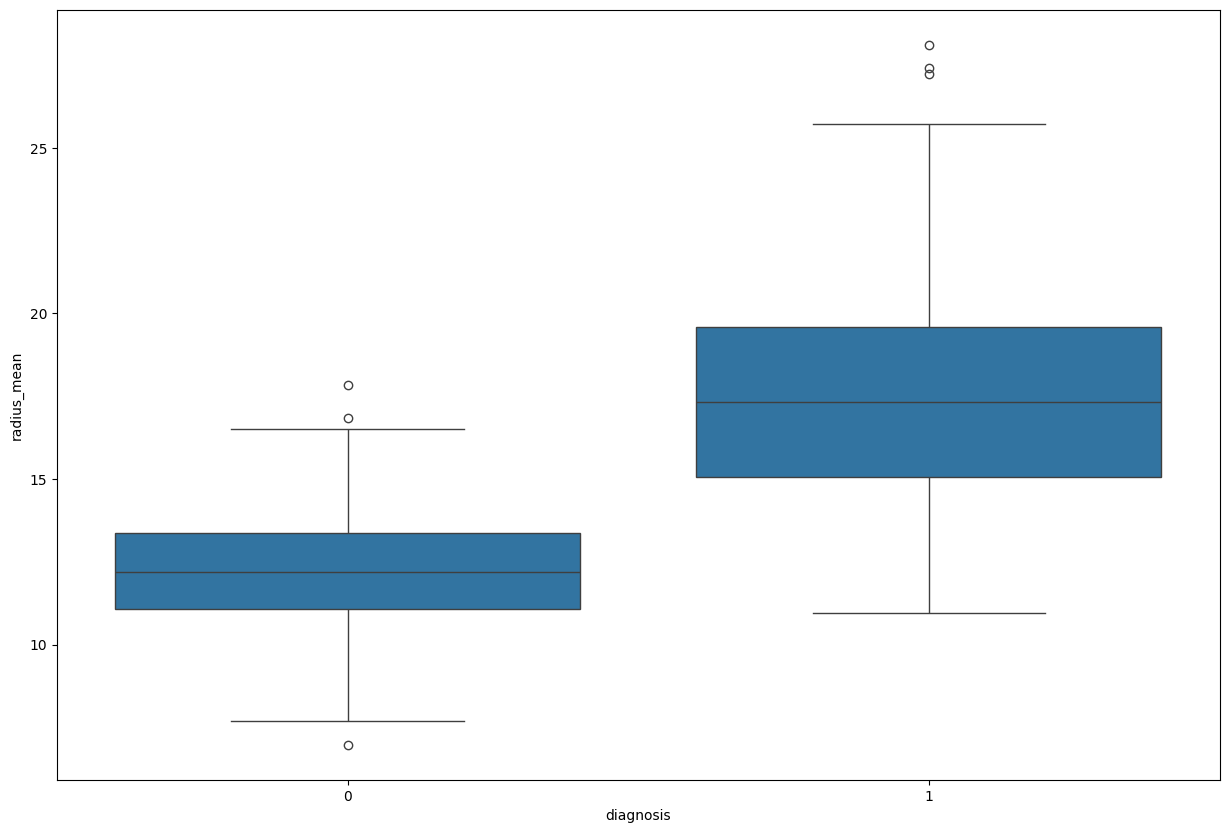

In [87]:
plt.figure(figsize=(15,10))
sns.boxplot(x="diagnosis",y="radius_mean",data=datas)
plt.show()

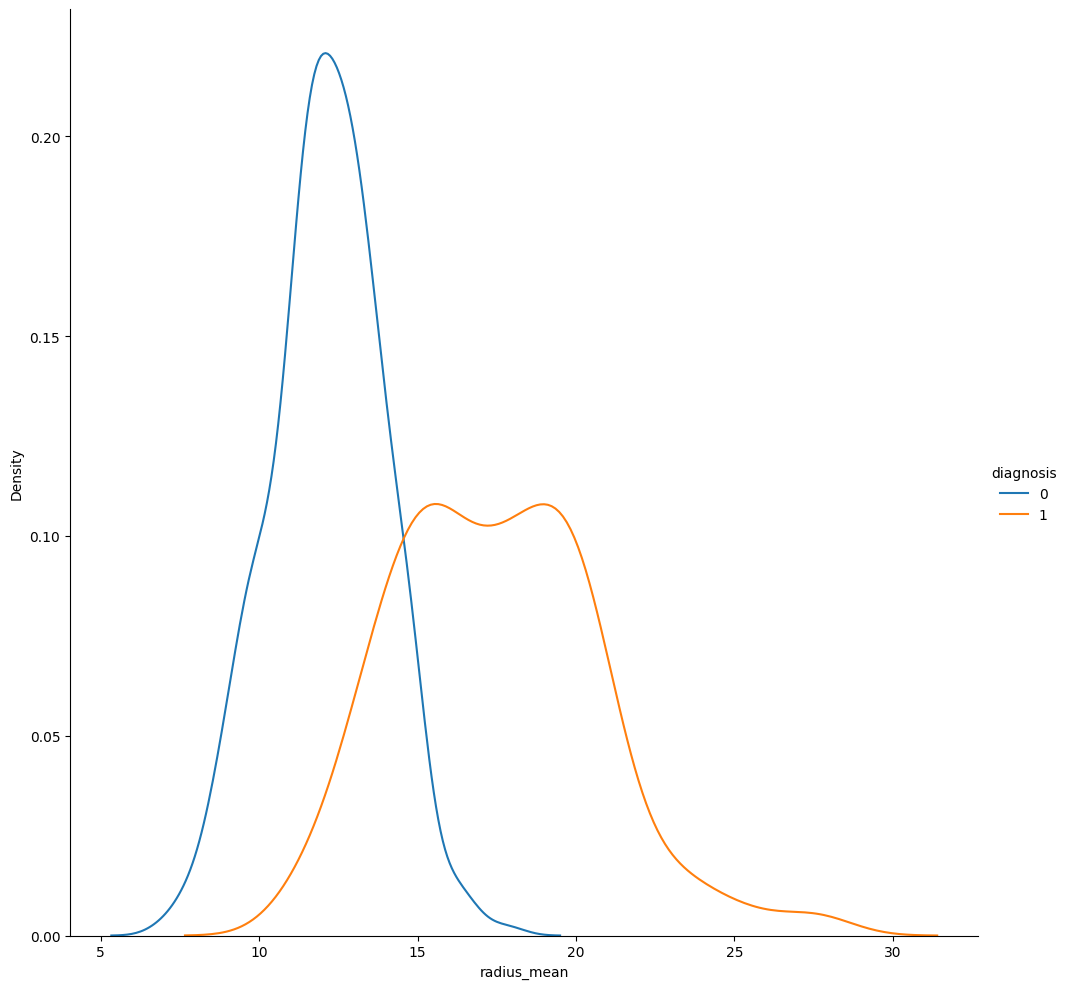

In [88]:
sns.FacetGrid(datas,hue='diagnosis',height=10).map(sns.kdeplot,"radius_mean").add_legend()
plt.show()

In [89]:
X = datas.drop(['diagnosis'],axis=1)
y = datas['diagnosis']

In [90]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.3,random_state = 0)

In [91]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(max_iter=10000)
logreg.fit(X_train,y_train)

LogisticRegression(max_iter=10000)

In [92]:
y_pred=logreg.predict(X_test)
accuracy_lr = round(metrics.accuracy_score(y_test,y_pred)*100,2)
print("Logistic Regression Accuracy:",accuracy_lr)

Logistic Regression Accuracy: 95.91


In [93]:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(X_train,y_train)

GaussianNB()

In [94]:
y_pred=model.predict(X_test)
accuracy_gnb = round(metrics.accuracy_score(y_test,y_pred)*100,2)
print("Gaussian NB Accuracy:",accuracy_gnb)

Gaussian NB Accuracy: 92.4


In [95]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier()
parameters = {'max_features':['log2','sqrt','auto'],
             'criterion':['entropy','gini'],
             'max_depth':[2,3,5,10,50],
             'min_samples_split':[2,3,50,100],
             'min_samples_leaf':[1,5,8,10]}
grid_obj = GridSearchCV(clf,parameters)
grid_obj = grid_obj.fit(X_train,y_train)
clf = grid_obj.best_estimator_
clf.fit(X_train,y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py:528: FitFailedWarning: 
800 fits failed out of a total of 2400.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
800 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.11/dist-packages/sklearn/base.py", line 1382, in wrapper
    estimator._validate_params()
  File "/usr/local/lib/python3.11/dist-packages/sklearn/base.py", line 436, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.11/dist-packages/sklearn/uti

DecisionTreeClassifier(criterion='entropy', max_depth=50, max_features='sqrt',
                       min_samples_leaf=10, min_samples_split=3)

In [96]:
y_pred = clf.predict(X_test)
accuracy_dt = round(metrics.accuracy_score(y_test,y_pred)*100,2)
print("Decision Tree Accuracy:",accuracy_dt)

Decision Tree Accuracy: 92.4


In [97]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
parameters = {'n_estimators': [4, 6, 9, 10, 15],
              'max_features': ['log2', 'sqrt','auto'],
              'criterion': ['entropy', 'gini'],
              'max_depth': [2, 3, 5, 10],
              'min_samples_split': [2, 3, 5],
              'min_samples_leaf': [1, 5, 8]
             }
grid_obj = GridSearchCV(rf,parameters)
grid_obj = grid_obj.fit(X_train,y_train)
rf = grid_obj.best_estimator_
rf.fit(X_train,y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py:528: FitFailedWarning: 
1800 fits failed out of a total of 5400.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
1800 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.11/dist-packages/sklearn/base.py", line 1382, in wrapper
    estimator._validate_params()
  File "/usr/local/lib/python3.11/dist-packages/sklearn/base.py", line 436, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.11/dist-packages/sklearn/u

RandomForestClassifier(criterion='entropy', max_depth=5, n_estimators=15)

In [98]:
accuracy_rf = round(metrics.accuracy_score(y_test,y_pred)*100,2)
print("Random Forest Classifier Accuracy:",accuracy_rf) #### hyper tuning above seem error

Random Forest Classifier Accuracy: 92.4


In [99]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [100]:
from sklearn import svm
svc = svm.SVC()
parameters = [
  {'C': [1, 10, 100, 1000], 'kernel': ['linear']},
  {'C': [1, 10, 100, 1000], 'gamma': [0.001, 0.0001], 'kernel': ['rbf']},
]
grid_obj = GridSearchCV(svc,parameters)
grid_obj = grid_obj.fit(X_train,y_train)
svc = grid_obj.best_estimator_
svc.fit(X_train,y_train)

SVC(C=100, gamma=0.001)

In [101]:
y_pred = svc.predict(X_test)
accuracy_svm = round(metrics.accuracy_score(y_test,y_pred)*100,2)
print("SVM Accuracy:",accuracy_svm)

SVM Accuracy: 98.25


In [106]:
from sklearn.neighbors import KNeighborsClassifier
# Initialize the KNeighborsClassifier
knn = KNeighborsClassifier()

# Define the hyperparameter grid to search over
parameters = {
    'n_neighbors' : [3, 4, 5, 10],  # Number of neighbors to consider
    'weights' : ['uniform', 'distance'],  # Weighting strategy for neighbors
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],  # Algorithm for distance computation
    'leaf_size' : [10, 20, 30, 50]  # Leaf size for ball_tree and kd_tree
}

# Create a GridSearchCV object with the KNN classifier and the parameter grid
grid_obj = GridSearchCV(knn, parameters)

# Fit the GridSearchCV on the training data
grid_obj = grid_obj.fit(X_train, y_train)

# Get the best estimator (model) from the grid search
knn = grid_obj.best_estimator_

# Fit the best model on the training data
knn.fit(X_train, y_train)

KNeighborsClassifier(leaf_size=10, n_neighbors=10, weights='distance')

In [107]:
y_pred = knn.predict(X_test)
accuracy_knn = round(metrics.accuracy_score(y_test,y_pred)*100,2)
print("KNN Accuracy:",accuracy_knn)

KNN Accuracy: 95.91


In [104]:
# สรุป performance แต่ละ model ที่ใช้
models_used = pd.DataFrame({
    'Model': ['Logistic Regression','Naive Bayes','Decision Tree','Random Forest',
              'Support Vector Machines','K-Nearest Neighbors'],
    'Score' : [accuracy_lr,accuracy_gnb,accuracy_dt,accuracy_rf,accuracy_svm,accuracy_knn]})
models_used.sort_values(by='Score')

,Model,Score
1,Naive Bayes,92.40
2,Decision Tree,92.40
3,Random Forest,92.40
0,Logistic Regression,95.91
5,K-Nearest Neighbors,95.91
4,Support Vector Machines,98.25
